<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve


**Importing the dataset**

In [4]:
df=pd.read_csv('/content/Social_Network_Ads .csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
from collections import Counter

print(Counter(df.Purchased))

df['Purchased'].value_counts()

Counter({0: 257, 1: 143})


0    257
1    143
Name: Purchased, dtype: int64

In [9]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [14]:
pd.crosstab(df.Gender,df.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


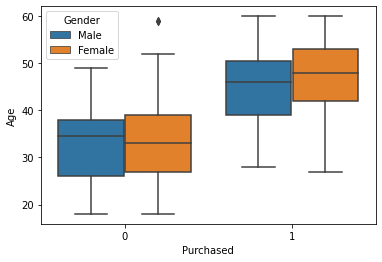

In [17]:
sns.boxplot(x='Purchased',y='Age',hue='Gender',data=df)
plt.show()

**Splitting the dataset into the Training set and Test set**

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,4]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=df['Purchased'])

In [34]:
x.shape,x_train.shape,x_test.shape

((400, 2), (320, 2), (80, 2))

**Feature Scaling**

In [35]:
scaler=StandardScaler().fit_transform(x_train,x_test)

**Fitting Decision Tree Classification to the Training set**

In [36]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [38]:
y_predict=model.predict(x_test)

y_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

**Making the Confusion Matrix**

In [39]:
cm=confusion_matrix(y_test,y_predict)

cm

array([[43,  8],
       [ 6, 23]])

In [41]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        51
           1       0.74      0.79      0.77        29

    accuracy                           0.82        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.83      0.82      0.83        80



In [42]:
print(accuracy_score(y_test,y_predict))

print(roc_auc_score(y_test,y_predict))

0.825
0.8181203515889115
